# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

In [3]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Import: Import the dataset into a statistical software tool such as Python or R.

In [8]:
#Data Import

data = pd.read_csv('Wholesale_Data.csv')

# Step 3: Preview the data
print("First 5 rows of the dataset:")
print(data.head())

print("\nShape of dataset:")
print(data.shape)

print("\nDataset info:")
print(data.info())

First 5 rows of the dataset:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

Shape of dataset:
(440, 8)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null

Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.

In [9]:
#Data Cleaning

print("\nSummary statistics:")
print(data.describe())

# Check for missing values
print("Missing values:")
print(data.isnull().sum())

# Check for duplicate rows
print("\nDuplicate rows:")
print(data.duplicated().sum())




Summary statistics:
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000     

Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.

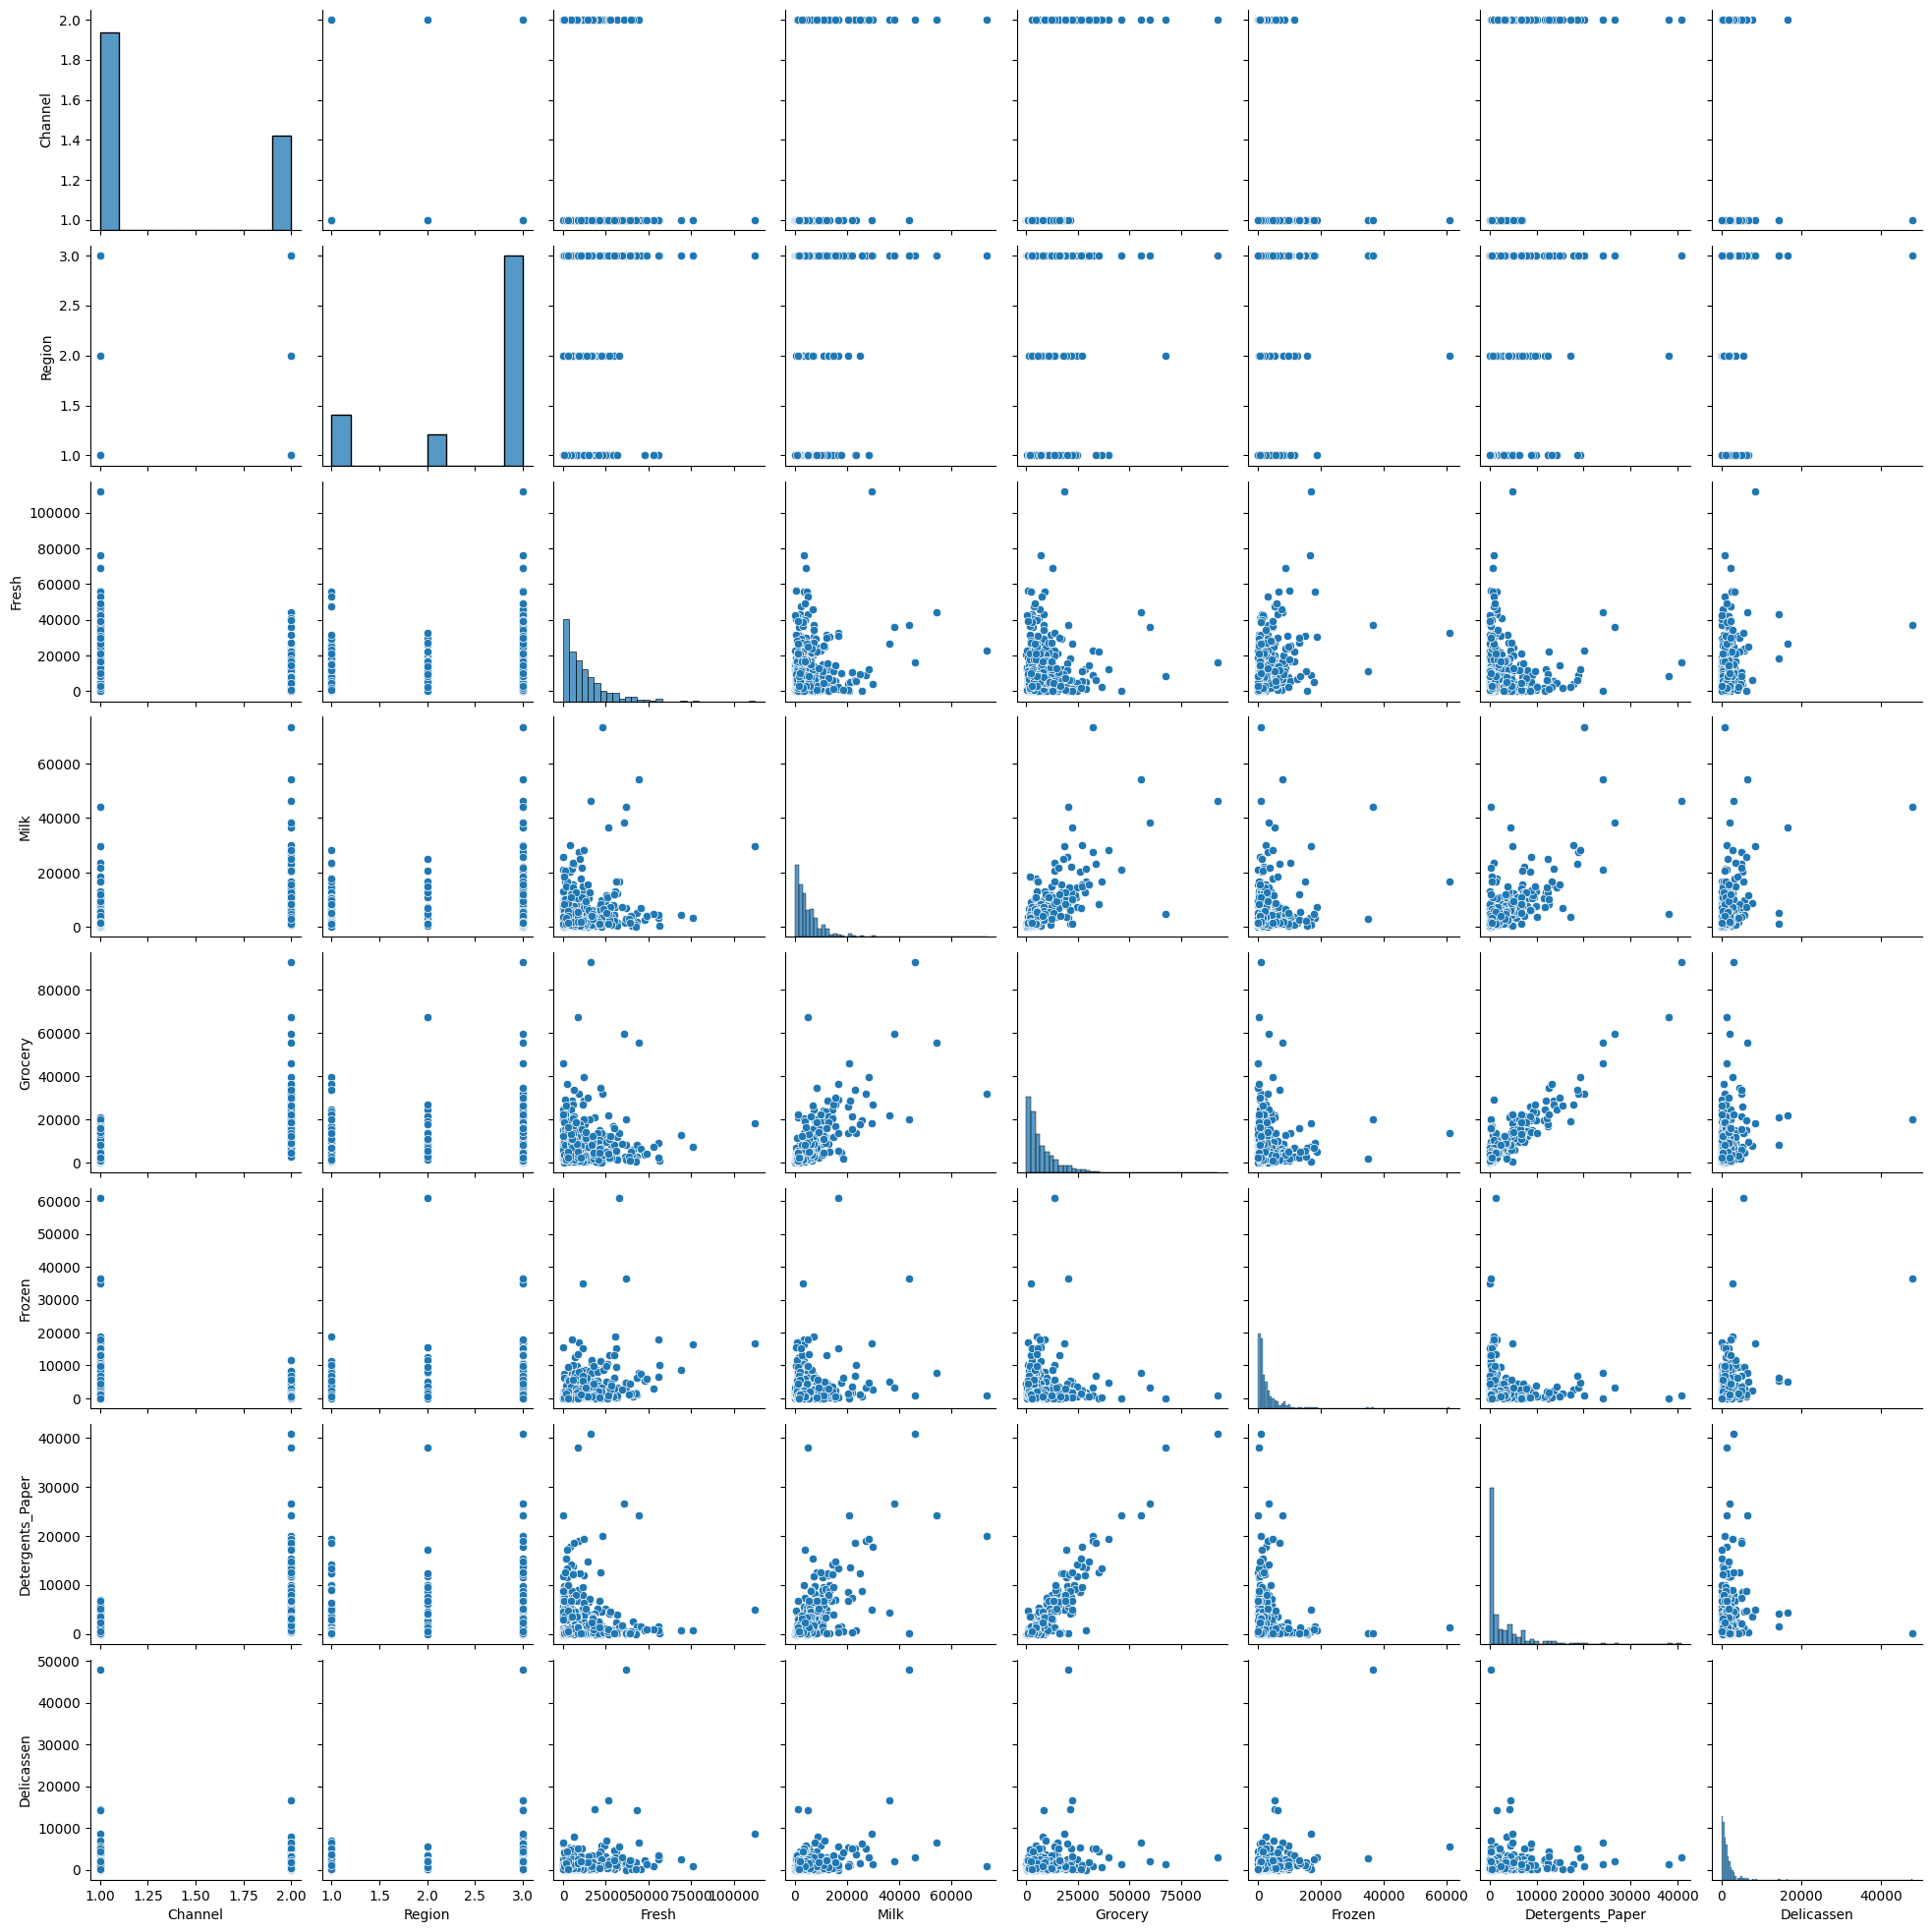

In [10]:
#Plots variables in a pairwise fashion

sns.pairplot(data)
plt.show()

Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.

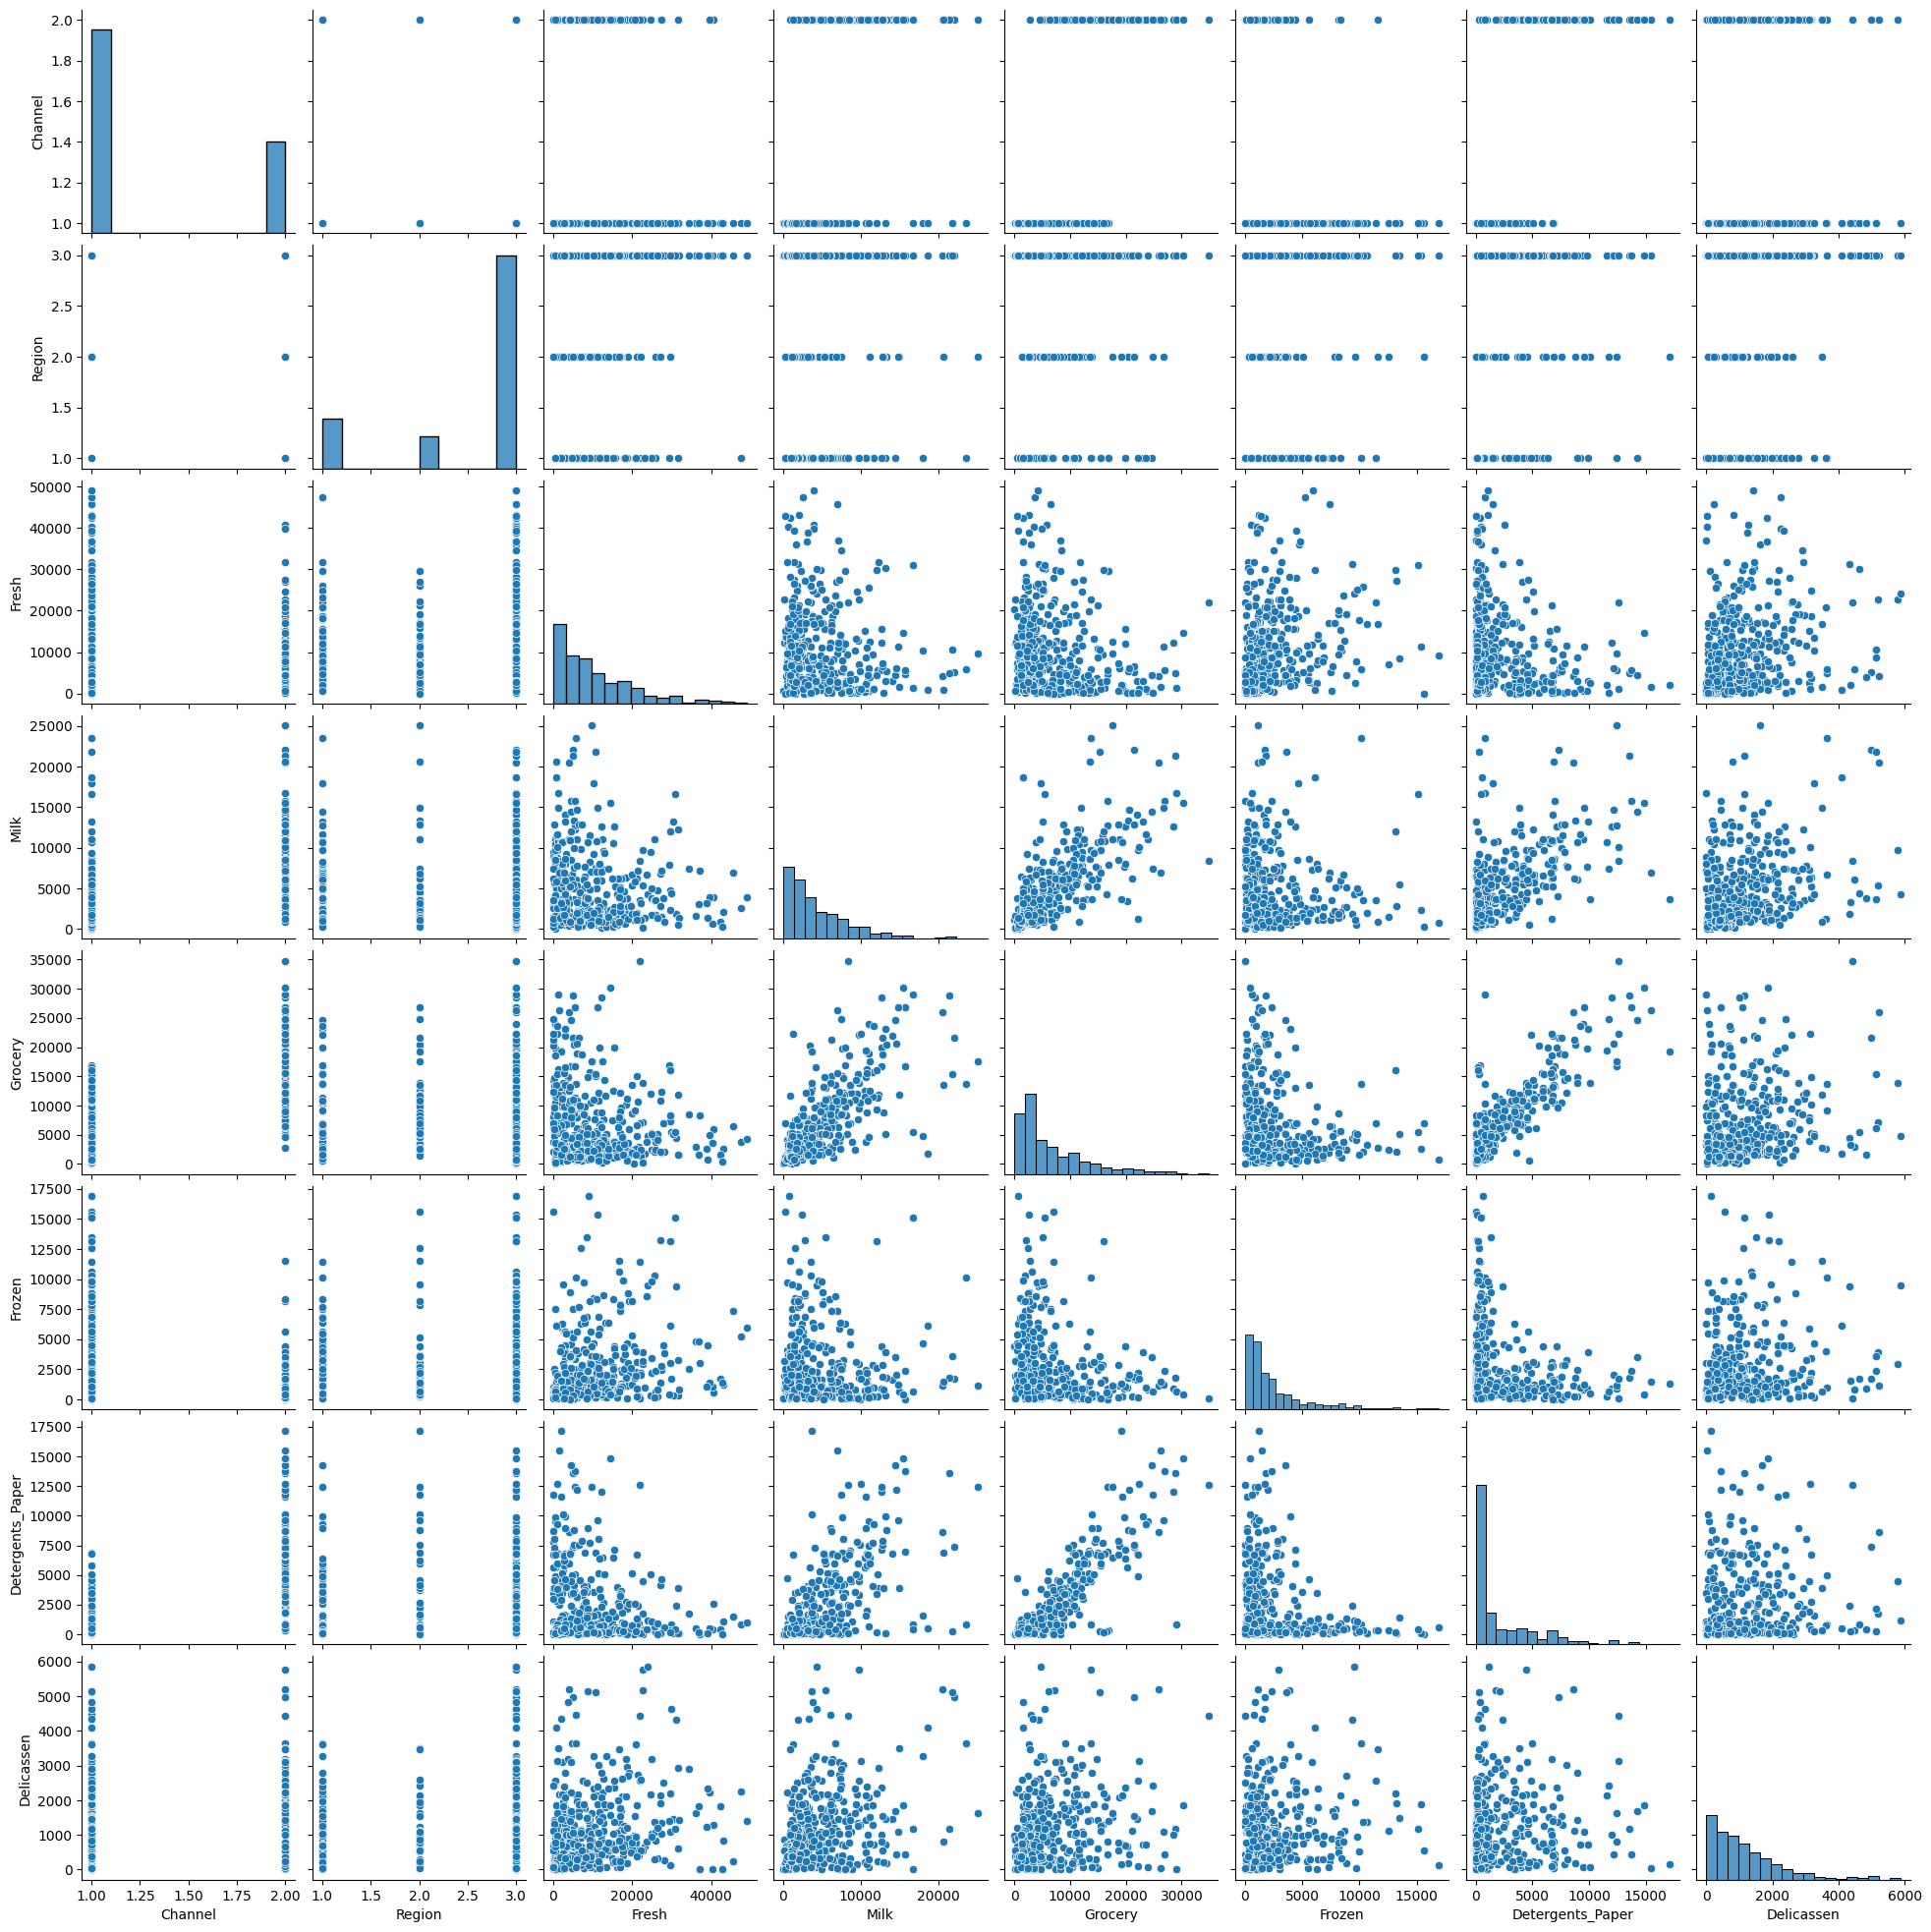

In [15]:
#Remove any data point that is outside of 3 standard deviations from the mean


cleaned_data = data[(np.abs(data - data.mean()) / data.std() < 3).all(axis=1)]

# Remove rows where 'Delicassen' is greater than 6000
cleaned_data = cleaned_data[cleaned_data['Delicassen'] <= 6000]


sns.pairplot(cleaned_data)
plt.show()

Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.

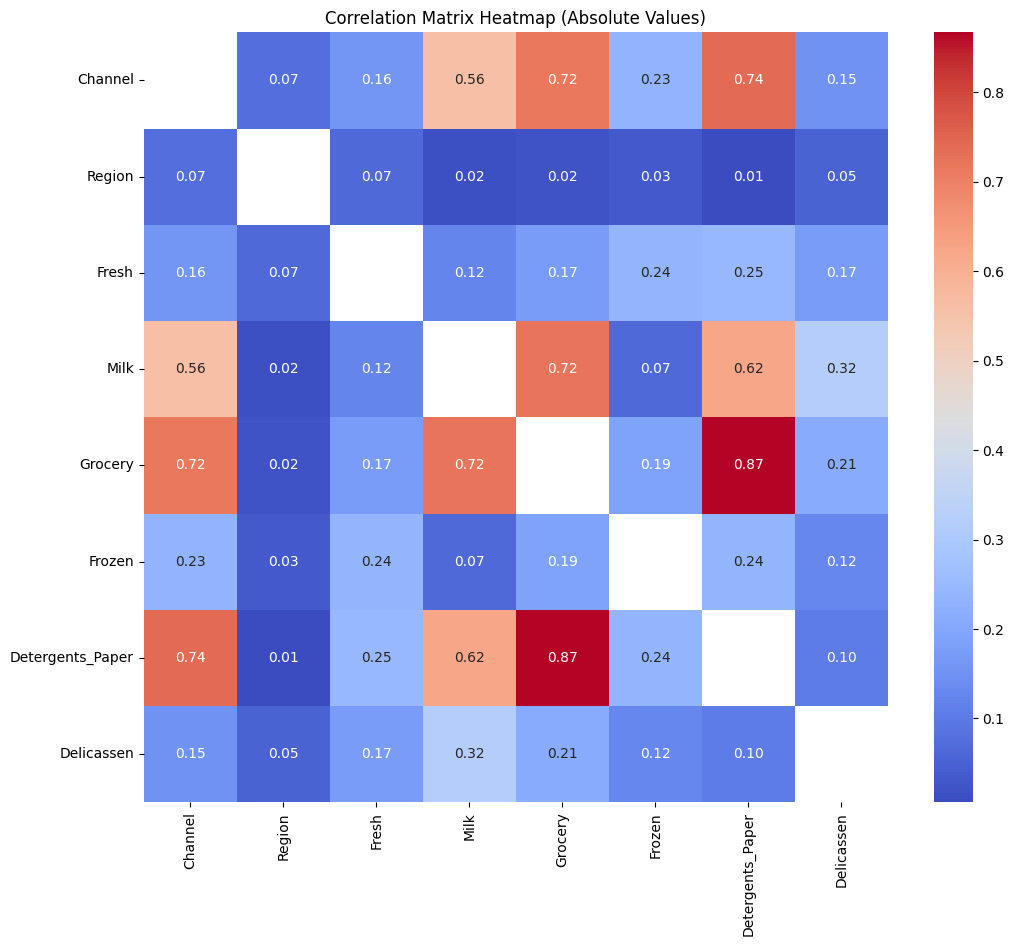

In [21]:
# prompt: Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables. Remove any correlations that are obvious 1.00 such as Channel vs Channel. Only plot absolute values.

# Calculate the correlation matrix
correlation_matrix = cleaned_data.corr()

# Remove diagonal part
correlation_matrix = correlation_matrix.mask(np.equal(*np.indices(correlation_matrix.shape)))

# Find the absolute values of correlations
correlation_matrix = correlation_matrix.abs()


# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.

In [23]:
from sklearn.preprocessing import StandardScaler

# Assuming 'cleaned_data' is your DataFrame after cleaning
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=cleaned_data.columns)

# Now 'scaled_df' contains your standardized data
print(scaled_df.head())


    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.492765  0.584212  0.196988  1.097678  0.125574 -0.799939   
1  1.492765  0.584212 -0.375740  1.132407  0.437572 -0.270258   
2 -0.669898  0.584212  0.257813 -0.810178 -0.393646  1.318099   
3  1.492765  0.584212  1.212019  0.140142  0.069144  0.466436   
4  1.492765  0.584212 -0.135300  0.782633 -0.252959 -0.645277   

   Detergents_Paper  Delicassen  
0          0.099930    0.142276  
1          0.293341    0.545317  
2         -0.577168    0.556359  
3         -0.180346    3.682222  
4         -0.174721    0.246257  


Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [33]:
from sklearn.decomposition import PCA

# Apply PCA with 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])

# Explained variance ratio
print(f"Variance Ratios: {pca.explained_variance_ratio_}")

principal_df.head(20)




Variance Ratios: [0.41267381 0.17397153]


,principal component 1,principal component 2
0,1.432273,0.089165
1,1.763704,0.289499
2,-1.323893,1.083661
3,0.976947,3.244939
4,1.001359,-0.020844
5,0.703817,-0.654221
6,1.371289,0.510844
7,-0.420262,-0.836991
8,3.374347,0.346141
9,1.923094,0.277745


[0.41267381 0.17397153]


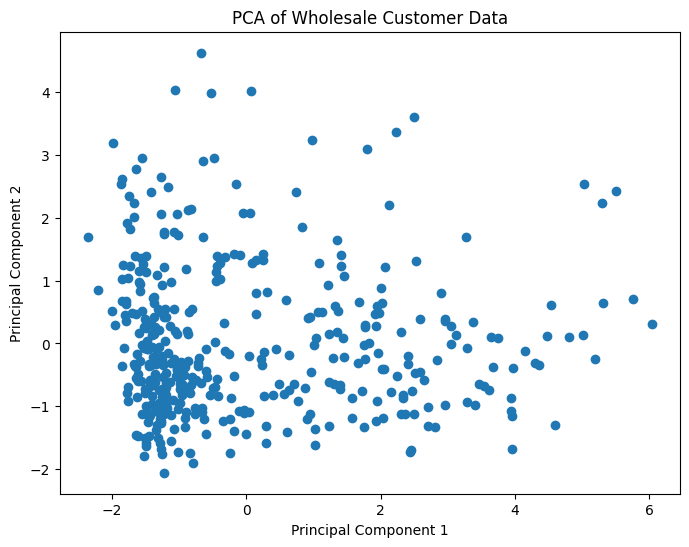

In [30]:
# Visualize the principal components
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['principal component 1'], principal_df['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wholesale Customer Data')
plt.show()

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

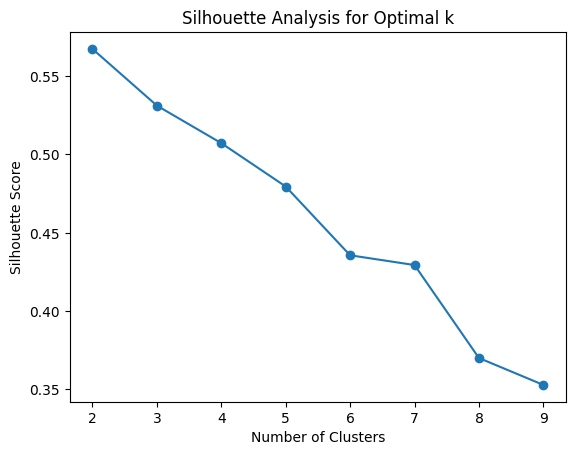

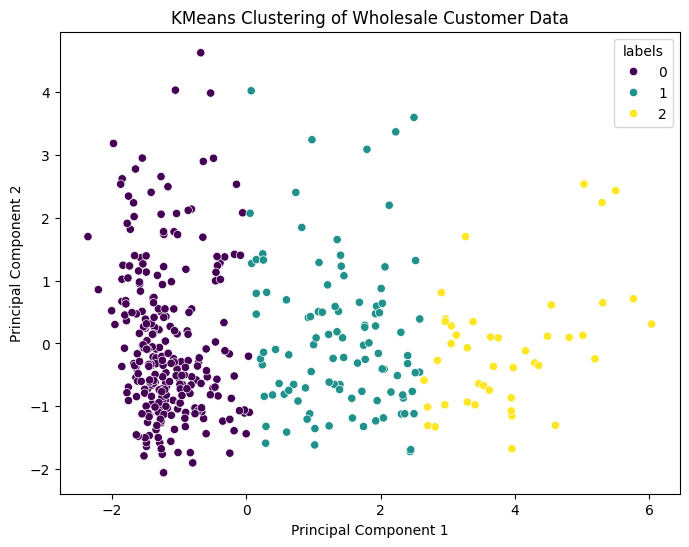

In [39]:
# prompt: The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine optimal number of clusters using silhouette analysis
range_n_clusters = range(2, 10)
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(principal_df)
    silhouette_avg = silhouette_score(principal_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()

# Based on the silhouette analysis, choose the optimal number of clusters
optimal_k = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(principal_df)
labels = pd.DataFrame(kmeans.labels_, columns=['labels'])

# Concatenate labels with principal components dataframe
final_df = pd.concat([principal_df, labels], axis=1)

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='principal component 1', y='principal component 2', hue='labels', data=final_df, palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering of Wholesale Customer Data')
plt.show()


# Part III - Hierarchical Clustering

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

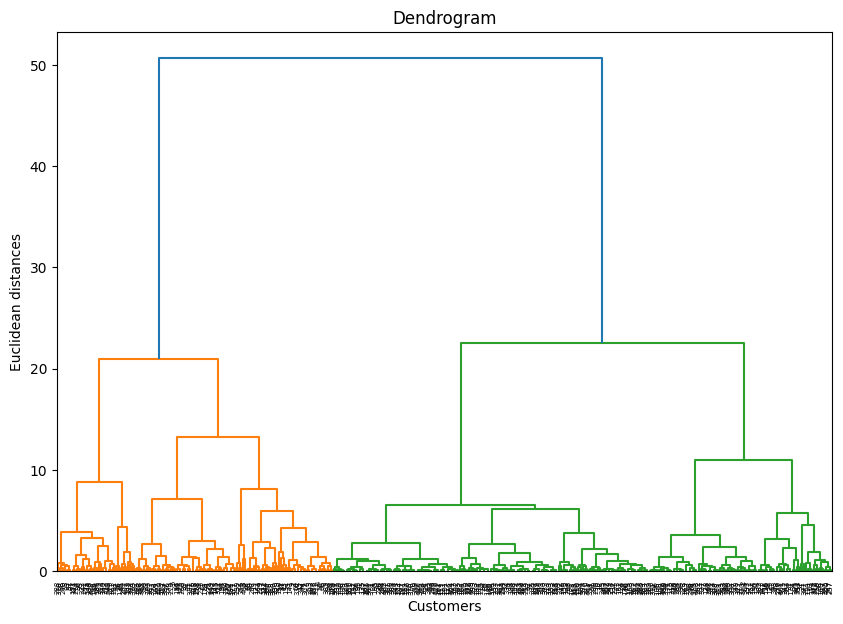

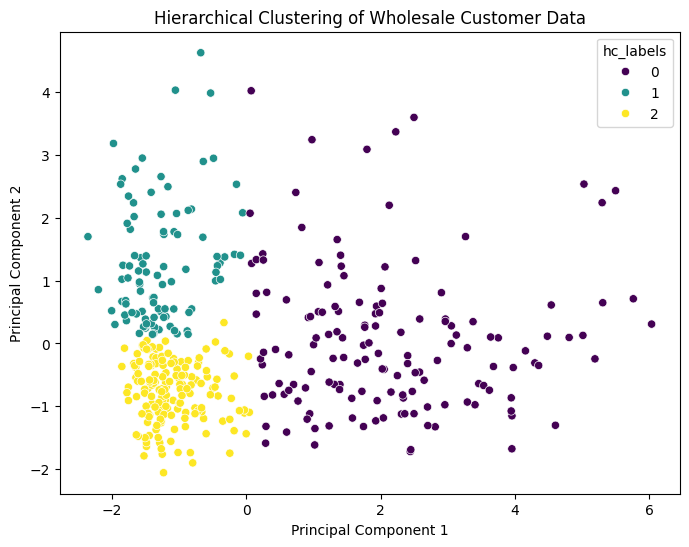

In [42]:
# prompt: Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.
# To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Use the principal components for hierarchical clustering
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(principal_df, method='ward')) # You can try different linkage methods
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Based on the dendrogram, choose the optimal number of clusters.  Let's say 3 for this example.
optimal_clusters_hc = 3

# Apply Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=optimal_clusters_hc, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(principal_df)

# Add the hierarchical clustering labels to the dataframe
final_df['hc_labels'] = y_hc

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='principal component 1', y='principal component 2', hue='hc_labels', data=final_df, palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hierarchical Clustering of Wholesale Customer Data')
plt.show()


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

Variance Ratios for all components: [0.41267381 0.17397153 0.1274713 ]
Cumulative Variance Ratios: [0.41267381 0.58664534 0.71411664]


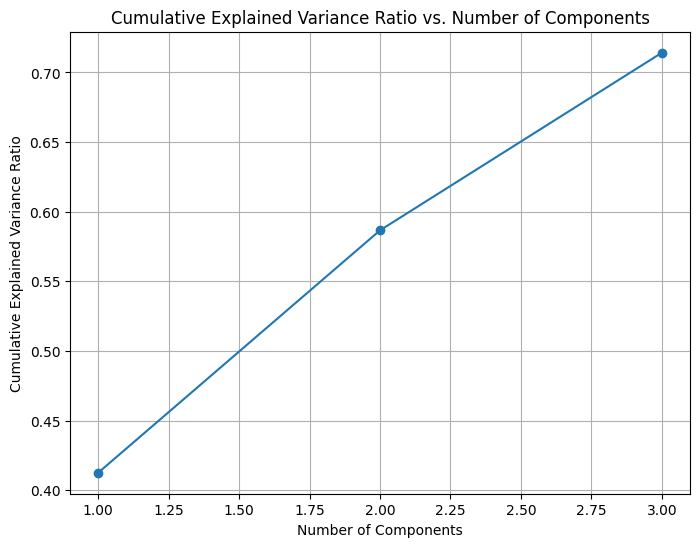

Number of components explaining 95% of the variance: 1
        PC1
0  1.432273
1  1.763704
2 -1.323893
3  0.976947
4  1.001359


In [47]:
# prompt: In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

# Explained variance ratio for all principal components
print(f"Variance Ratios for all components: {pca.explained_variance_ratio_}")

# Cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
print(f"Cumulative Variance Ratios: {cumulative_variance_ratio}")

# Plotting the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.grid(True)  # Add a grid for better readability
plt.show()

# Determine the number of components that explain a significant amount of variance
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print(f"Number of components explaining 95% of the variance: {n_components_95}")

# Apply PCA with the determined number of components
pca_95 = PCA(n_components=n_components_95)
principal_components_95 = pca_95.fit_transform(scaled_df)

# Create a DataFrame with the principal components
principal_df_95 = pd.DataFrame(data=principal_components_95, columns=[f'PC{i+1}' for i in range(n_components_95)])

print(principal_df_95.head())


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

* **Strong correlations exist between product categories:**  The EDA revealed significant correlations between several product categories, suggesting that customers purchasing large quantities of one product type tend to purchase more of others.  This was visualized using a heatmap and pairplots.

* **Outliers impact data distribution:**  Outliers were present in the dataset, particularly in the 'Delicassen' category. Removing these outliers altered the data distribution and influenced subsequent analyses like clustering.

* **Two principal components explain significant variance:** PCA analysis demonstrated that two principal components captured a substantial amount of the data's variance, enabling a dimensionality reduction for subsequent clustering tasks.

* **KMeans and Hierarchical clustering suggest distinct customer segments:**  Both KMeans and Hierarchical clustering methods identified a few distinct customer segments based on the reduced feature set provided by PCA. The optimal number of clusters was determined using silhouette analysis for KMeans and visually from a dendrogram for hierarchical clustering.
